In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn = sqlite3.connect('../data/dinofunworld.db')
cur = conn.cursor()

# Assignment: Dino Fun World Time Series Analysis

The administrators of Dino Fun World, a local amusement park, have asked you, one of their data analysts, to perform three data analysis tasks for their park. These tasks will involve understanding, analyzing, and graphing attendance data that the park has provided for you to use. They have provided the data in the form of a database, described below.

---

## Provided Database

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the `sqlite3` library. The database contains three tables: `checkins`, `attractions`, and `sequences`. Below is the description of each table:

- **`checkins`**:
  - **Description**: Check-in data for all visitors for the day in the park. The data includes two types of check-ins, inferred and actual check-ins.
  - **Fields**:
    - `visitorID`
    - `timestamp`
    - `attraction`
    - `duration`
    - `type`

- **`attractions`**:
  - **Description**: The attractions in the park by their corresponding `AttractionID`, `Name`, `Region`, `Category`, and `Type`. 
    - Regions are from the VAST Challenge map, such as Coaster Alley, Tundra Land, etc.
    - Categories include Thrill rides, Kiddie Rides, etc.
    - Type is broken into Outdoor Coaster, Other Ride, Carousel, etc.
  - **Fields**:
    - `AttractionID`
    - `Name`
    - `Region`
    - `Category`
    - `type`

- **`sequences`**:
  - **Description**: The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes.
    - If the visitor has not entered the park yet, the sequence has a value of 0 for that time interval.
    - If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
  - **Fields**:
    - `visitorID`
    - `sequence`

The database is named `dinofunworld.db` and is available in the readonly directory of the Jupyter Notebook environment (i.e., `readonly/dinofunworld.db`).

---

## Questions to Answer

1. **Control Chart for 'Atmosfear' Attendance**  
   The park's administrators are concerned about the attendance at the ride *'Atmosfear'* in the data window. To address their concerns, create a **control chart** of the total attendance at this ride. The chart should display:
   - Attendance over time
   - The mean attendance
   - Standard deviation bands at one and two standard deviations

2. **Moving Average Chart for 'Atmosfear' Attendance**  
   Some administrators find the control chart difficult to interpret. To assist them, provide a **moving average chart** of the attendance at *'Atmosfear'*. Use a moving average window of **50 samples**.

3. **Exponentially Weighted Moving Average (EWMA) Chart**  
   To give administrators additional options, create an **Exponentially Weighted Moving Average (EWMA)** chart of the *'Atmosfear'* attendance data. Use an **EWMA window of 50 samples**.

---

## Administrative Notes

- **Grading System**: This assignment will be graded by Coursera's grading system.
- **Code Submission**: 
  - Place your code for each answer in the cell indicated for the question.
  - Ensure that the output of your code appears in the cell's display area. Extraneous information in the output may result in incorrect grading.
- **Important Comments**:
  - Each graded cell has a set of comment lines at the beginning of the cell. These lines are **critical** and must not be modified or removed.


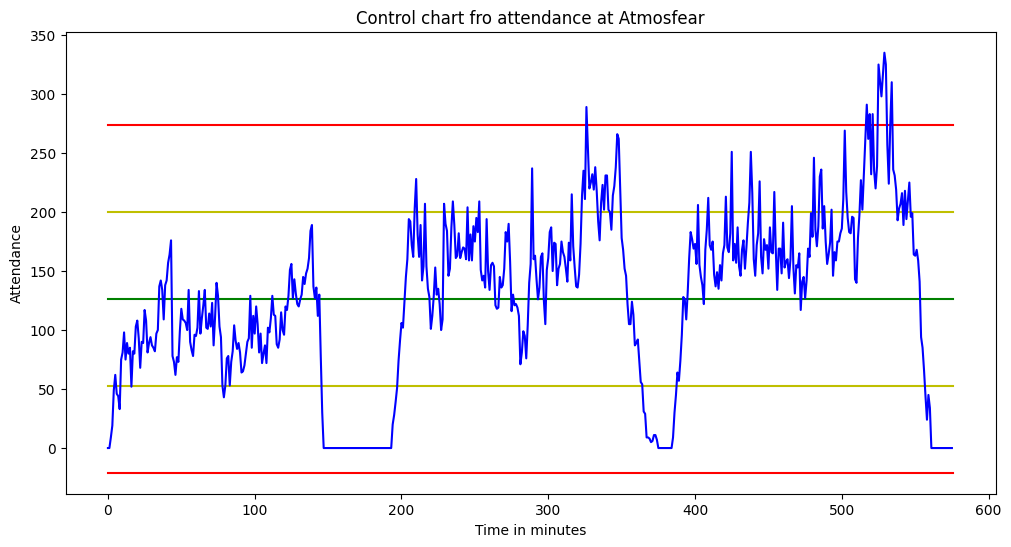

In [6]:
#Answer 1:
time_interval = 5
attractionID = pd.read_sql("SELECT attractionId FROM attraction WHERE attraction.Name = 'Atmosfear';",conn)['AttractionID'][0]
new_df = pd.read_sql("SELECT visitorID AS visitor, sequence FROM sequences WHERE sequence LIKE '%" + str(attractionID) + "%';",conn)
new_df['seq_list'] = new_df['sequence'] \
.apply(lambda sequence: [1 if visit == str(attractionID) else 0 for visit in sequence.split("-")])
visitor_attendance = np.sum(new_df['seq_list'].values.tolist(), axis=0)
visitors_list = range(0, len(visitor_attendance)*time_interval, time_interval)
mean_value = np.nanmean(visitor_attendance)
std_value = np.nanstd(visitor_attendance)
list_data = []
for i in range(len(visitors_list)):
    list_data.append(visitor_attendance[i])
plt.figure(figsize=(12,6))
plt.plot([0,len(visitors_list)], [mean_value,mean_value], 'g-')
plt.plot([0,len(visitors_list)], [mean_value+std_value,mean_value+std_value], 'y-')
plt.plot([0,len(visitors_list)], [mean_value-std_value,mean_value-std_value], 'y-')
plt.plot([0,len(visitors_list)], [mean_value+2*std_value,mean_value+2*std_value], 'r-')
plt.plot([0,len(visitors_list)], [mean_value-2*std_value,mean_value-2*std_value], 'r-')
plt.plot(range(len(visitors_list)), visitor_attendance, 'b-')
plt.ylabel('Attendance')
plt.xlabel('Time in minutes')
plt.title('Control chart fro attendance at Atmosfear')
plt.show()

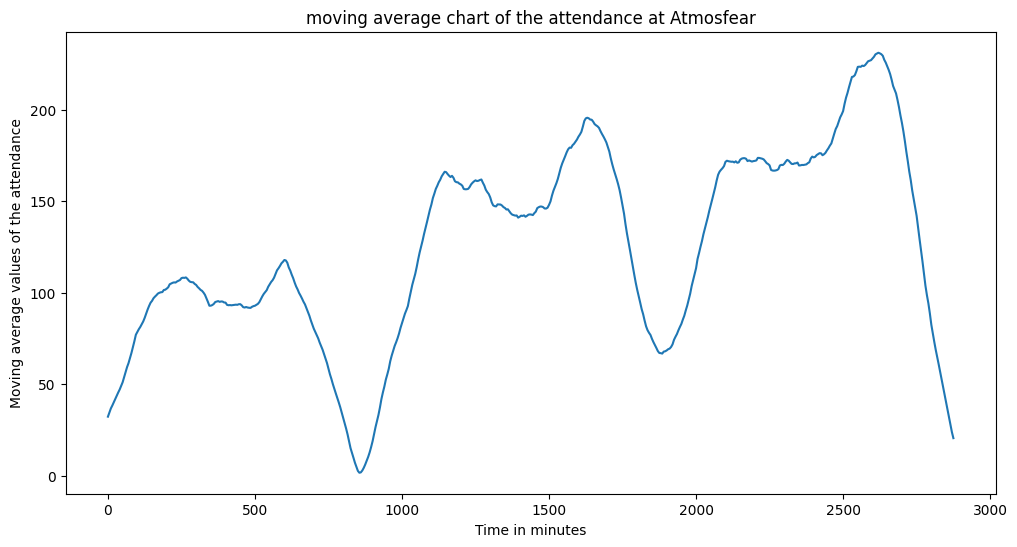

In [7]:
#Answer2:
window_size = 50
moving_avg_list = np.convolve(visitor_attendance, np.ones(window_size,)/window_size, 'same')
plt.figure(figsize=(12,6))
plt.plot(visitors_list,moving_avg_list)
plt.ylabel('Moving average values of the attendance')
plt.xlabel('Time in minutes')
plt.title('moving average chart of the attendance at Atmosfear')
plt.show()

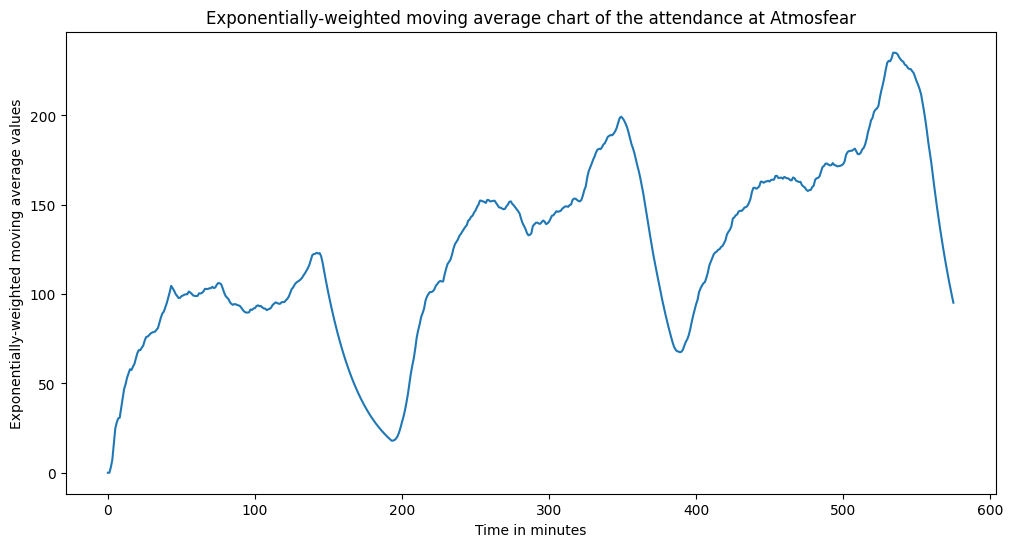

In [8]:
#Answer3:
visitors_attendance_df = pd.DataFrame(visitor_attendance)
visitors_attendance_df_exp = visitors_attendance_df.ewm(span=50).mean()
plt.figure(figsize=(12,6))
plt.plot(visitors_attendance_df_exp)
plt.ylabel('Exponentially-weighted moving average values')
plt.xlabel('Time in minutes')
plt.title('Exponentially-weighted moving average chart of the attendance at Atmosfear')
plt.show()